# The Math behind the PCA

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.DataFrame({
    'Feature_1': [-83, 10, 303, 150, 701],
    'Feature_2': [-5, 22, 33, 97, 919],
    'Feature_3': [5, 9, 133, 20, 33],
    'Feature_4': [-227, -39, -431, 196, 620],
}, index=['p1', 'p2', 'p3', 'p4', 'p5'])

data

,Feature_1,Feature_2,Feature_3,Feature_4
p1,-83,-5,5,-227
p2,10,22,9,-39
p3,303,33,133,-431
p4,150,97,20,196
p5,701,919,33,620


## Steps

---

#### 1. Looking for mean values of all features

In [3]:
data.loc['Mean Values'] = data.mean()
data

,Feature_1,Feature_2,Feature_3,Feature_4
p1,-83.0,-5.0,5.0,-227.0
p2,10.0,22.0,9.0,-39.0
p3,303.0,33.0,133.0,-431.0
p4,150.0,97.0,20.0,196.0
p5,701.0,919.0,33.0,620.0
Mean Values,216.2,213.2,40.0,23.8


#### 2. Subtract row/feature value - mean value

In [4]:
for f in data.columns:
    data.iloc[:-1] = data.iloc[:-1] - data.iloc[:-1].mean()

data

,Feature_1,Feature_2,Feature_3,Feature_4
p1,-299.2,-218.2,-35.0,-250.8
p2,-206.2,-191.2,-31.0,-62.8
p3,86.8,-180.2,93.0,-454.8
p4,-66.2,-116.2,-20.0,172.2
p5,484.8,705.8,-7.0,596.2
Mean Values,216.2,213.2,40.0,23.8


In [5]:
data.loc['Mean Values after calc'] = data.iloc[:-2].mean()
data

,Feature_1,Feature_2,Feature_3,Feature_4
p1,-299.2,-218.20,-35.00,-250.80
p2,-206.2,-191.20,-31.00,-62.80
p3,86.8,-180.20,93.00,-454.80
p4,-66.2,-116.20,-20.00,172.20
p5,484.8,705.80,-7.00,596.20
Mean Values,216.2,213.20,40.00,23.80
Mean Values after calc,-121.2,-176.45,1.75,-149.05


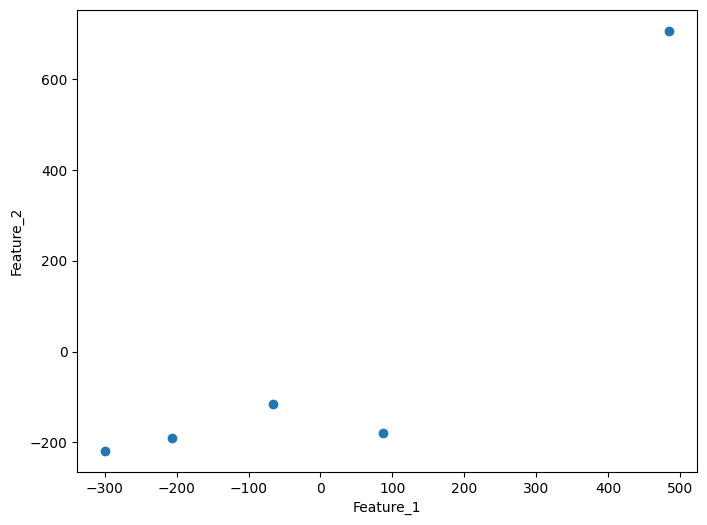

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:-2, 0], data.iloc[:-2, 1])
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()

### 3. Calculate covariation metrix

In [7]:
cov_matrix = data.iloc[:-2].cov()
cov_matrix

,Feature_1,Feature_2,Feature_3,Feature_4
Feature_1,94746.70,109733.45,5716.75,81537.55
Feature_2,109733.45,157074.20,-1452.75,137368.80
Feature_3,5716.75,-1452.75,2821.00,-9797.25
Feature_4,81537.55,137368.80,-9797.25,164698.70


### 4. Looking for eigenvalues and eigenvectors

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [9]:
eig_vals

array([3.65896218e+05, 4.74128787e+04, 6.03092273e+03, 5.80368007e-01])

In [10]:
eig_vecs

array([[ 0.44698951,  0.6463691 , -0.55114536, -0.28043923],
       [ 0.64358986,  0.22415827,  0.72095521,  0.12557364],
       [-0.01229861,  0.22779297, -0.22484621,  0.94731372],
       [ 0.62116118, -0.69287114, -0.35483314,  0.09045336]])

In [11]:
idx = np.argsort(eig_vals)[::-1]
idx

array([0, 1, 2, 3])

In [12]:
eig_vals_sorted = eig_vals[idx]
eig_vals_sorted

array([3.65896218e+05, 4.74128787e+04, 6.03092273e+03, 5.80368007e-01])

In [13]:
eig_vecs_sorted = eig_vecs[:, idx]
eig_vecs_sorted

array([[ 0.44698951,  0.6463691 , -0.55114536, -0.28043923],
       [ 0.64358986,  0.22415827,  0.72095521,  0.12557364],
       [-0.01229861,  0.22779297, -0.22484621,  0.94731372],
       [ 0.62116118, -0.69287114, -0.35483314,  0.09045336]])

In [14]:
W = eig_vecs_sorted[:, :2]
W

array([[ 0.44698951,  0.6463691 ],
       [ 0.64358986,  0.22415827],
       [-0.01229861,  0.22779297],
       [ 0.62116118, -0.69287114]])

In [15]:
X_centered = data.iloc[:-2]              
Z = np.dot(X_centered, W)                
Z

array([[-429.52734147,  -76.5056411 ],
       [-253.85128305, -139.68964425],
       [-360.82408097,  352.01405879],
       [   2.83408088, -192.70509556],
       [1041.36862461,   56.88632212]])

In [16]:
Z = pd.DataFrame(Z, columns=['PC1', 'PC2'])
Z

,PC1,PC2
0,-429.527341,-76.505641
1,-253.851283,-139.689644
2,-360.824081,352.014059
3,2.834081,-192.705096
4,1041.368625,56.886322


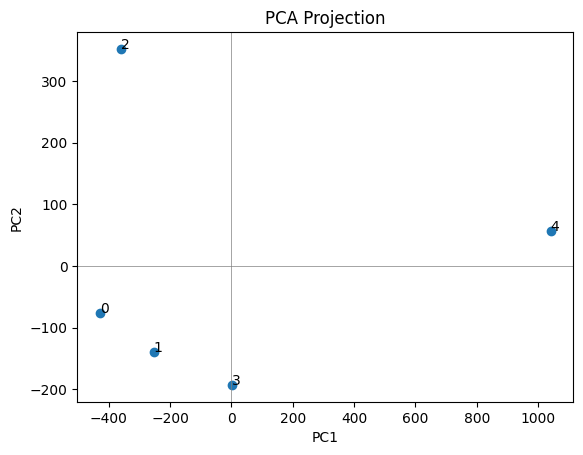

In [17]:
plt.scatter(Z['PC1'], Z['PC2'])

for i, label in enumerate(Z.index):
    plt.text(Z['PC1'][i], Z['PC2'][i], label)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

plt.show()

In [18]:
loadings = pd.DataFrame(W, index=X_centered.columns, columns=['PC1','PC2'])
loadings

,PC1,PC2
Feature_1,0.446990,0.646369
Feature_2,0.643590,0.224158
Feature_3,-0.012299,0.227793
Feature_4,0.621161,-0.692871
